# Import

In this cell, we import bridge data from a CSV file located one step above the notebook's directory. The data is loaded into a DataFrame for further analysis.


In [1]:
import os
import pandas as pd

# Get the current working directory
current_dir = os.getcwd()

# Navigate one step above the current directory
parent_dir = os.path.dirname(current_dir)

# Construct the full path to your CSV file
csv_file_path = os.path.join(parent_dir, 'data_full.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now, 'df' contains your dataset from 'C:\Users\Doktor\Documents\GitHub\Bridges\data_full.csv'

## Rename Columns

In this step, we rename the columns of the DataFrame to make them more descriptive and readable for analysis.

In [2]:
# Rename the columns
df.rename(columns={
    'ID mosta': "Bridge_ID",
    'Okres': "District",
    'Longitude': "Longitude",
    'Latitude': "Latitude",
    'Material': "Material",
    'Názov mosta': "Bridge_Name",
    'Dĺžka premostenia': "Bridge_Length",
    'Rok postavenia': "Year_of_Construction",
    'Volná šírka mosta': "Bridge_Width",
    'Normána zaťažiteľnost': "Load_Capacity",
    'Trieda PK': "Road_Class",
    'Druh konštrukcie': "Type_of_Structure",
    'Kraj': "Region",
    'n_2012': "num_2012",
    'n_2013': "num_2013",
    'n_2014': "num_2014",
    'n_2015': "num_2015",
    'n_2016': "num_2016",
    'n_2017': "num_2017",
    'n_2018': "num_2018",
    'n_2019': "num_2019",
    'n_2020': "num_2020",
    'n_2021': "num_2021",
    'n_2022': "num_2022",
    'n_2023': "num_2023",
    'Predmet premostenia': "Bridge_Purpose"

}, inplace=True)

In [3]:
columns_to_remove = [str(i) for i in range(2012, 2024)]

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

### Filtering Data in Pandas DataFrame

This code snippet filters a Pandas DataFrame to select rows based on two conditions:

1. Rows where the "num_2023" column is not equal to zero.
2. Rows where the "Bridge_Length" column is not a NaN value.

It uses the `~df["Bridge_Length"].isna()` condition to check for non-NaN values in the "Bridge_Length" column and combines the conditions using the `&` operator to ensure both conditions are met.


In [4]:
import numpy as np

classified_bridges = df[(df["num_2023"] != 0) & (
    ~df["Bridge_Length"].isna()) & (df["Bridge_Length"] != "Nezistený")]

nan_category_bridges = classified_bridges[pd.isna(
    classified_bridges["Bridge_Length"])]
len(nan_category_bridges[["Bridge_ID", "Bridge_Length"]])

0

**Histogram of Bridge Length (Logarithmic Scale)**

In this plot, we visualize the distribution of bridge lengths using a histogram with a logarithmic x-axis scale. The dataset used is `classified_bridges["Bridge_Length"]`.

**Plot Details:**

- The histogram is created with logarithmic bins, enhancing the visibility of variations in bridge lengths.
- The x-axis represents "Bridge Length" in a logarithmic scale, making it suitable for visualizing a wide range of values.
- The y-axis represents the frequency of bridges within each bin.
- Each bin is annotated with the approximate mean length of bridges in that bin, displayed in meters.
- Y-axis ticks are customized to provide a clearer view of frequency.
- A semi-transparent grid is added to the y-axis for reference.

This histogram helps us understand the distribution of bridge lengths in the dataset, highlighting any trends or clusters in bridge lengths.


[   1.95          3.85320702    7.61395093   15.04519442   29.7293583
   58.74531896  116.08096162  229.37639777  453.24858722  895.62083899
 1769.75      ]


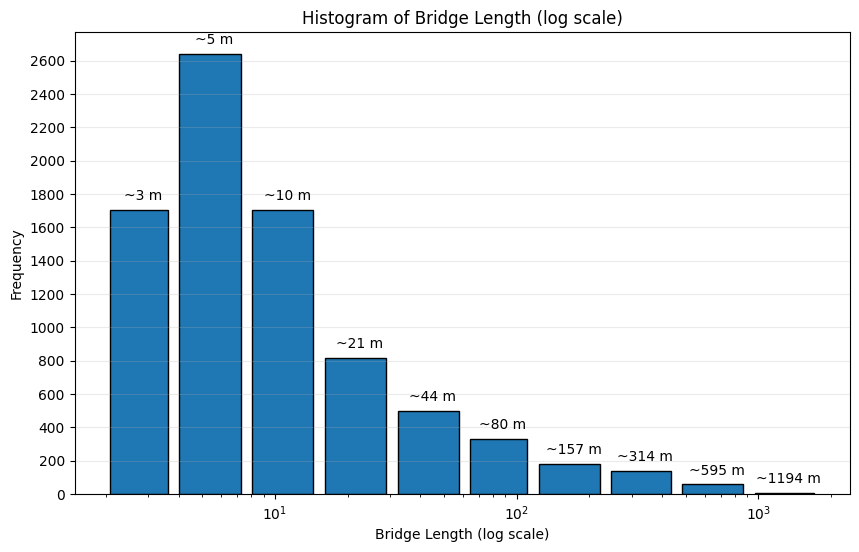

In [5]:
import numpy as np
import matplotlib.pyplot as plt

number_of_bins = 11
labels_blc = [str(i+1) for i in range(number_of_bins - 1)]  # Reduce by one

# Convert the "Bridge_Length" column to numeric (float) using .loc
classified_bridges.loc[:, "Bridge_Length"] = pd.to_numeric(
    classified_bridges["Bridge_Length"], errors="coerce")

# Define the parameters for the histogram plot
data = classified_bridges["Bridge_Length"]

# Create logarithmic bins for the x-axis
log_bins = np.logspace(np.log10(data.min()), np.log10(
    data.max()), num=number_of_bins)
print(log_bins)

log_bins = ([1.94,    3.75,    7.5,   15.0,  30.0,   60.0,  115.0,  230.0,
             450.0,  900.0, 1770.00])

# Create a histogram with logarithmic x-axis and adjust bin spacing (rwidth)
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(data, bins=log_bins, edgecolor='k', rwidth=0.85)
plt.xscale('log')  # Set x-axis to log scale
plt.xlabel("Bridge Length (log scale)")
plt.ylabel("Frequency")
plt.title("Histogram of Bridge Length (log scale)")

# Calculate and annotate the mean value for each bin
bin_means = [data[(data >= bin_start) & (data < bin_end)].mean()
             for bin_start, bin_end in zip(bins[:-1], bins[1:])]

for i, bin_mean in enumerate(bin_means):
    plt.annotate(f"~{bin_mean:.0f} m",
                 xy=(bins[i] + (bins[i + 1] - bins[i]) / 2, hist[i]),
                 xytext=(0, 5), textcoords='offset points',
                 ha='center', va='bottom')

# Customize the y-axis ticks and enable grid with transparency
# Adjust the range and step as needed
plt.yticks(np.arange(0, max(hist) + 1, 200))
plt.grid(True, axis='y', alpha=0.25)  # Set alpha for transparency


In [6]:

# Define the boundaries of the bins
bin_boundaries = list(log_bins)

# Create a list of category descriptions based on the bin boundaries
category_descriptions = [f"{bin_start:.2f} - {bin_end:.2f} m"
                         for bin_start, bin_end in zip(bin_boundaries[:-1], bin_boundaries[1:])]

# Create a dictionary to map category labels to descriptions
category_description_mapping = {label: description for label, description in zip(
    labels_blc, category_descriptions)}

# Create a new column "Bridge_Length_Category" based on the logarithmic bins
classified_bridges["Bridge_Length_Category"] = pd.cut(classified_bridges["Bridge_Length"],
                                                      bins=log_bins,
                                                      labels=labels_blc)  # Use labels as category numbers

C:\Users\Doktor\AppData\Local\Temp\ipykernel_16924\2993448055.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classified_bridges["Bridge_Length_Category"] = pd.cut(classified_bridges["Bridge_Length"],


In [7]:
# Use .loc[] to split the strings and remove leading spaces
classified_bridges["Bridge_Purpose"].loc[:] = classified_bridges["Bridge_Purpose"].apply(
    lambda x: [purpose.strip() for purpose in x.split(',')])

C:\Users\Doktor\AppData\Local\Temp\ipykernel_16924\2203495243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classified_bridges["Bridge_Purpose"].loc[:] = classified_bridges["Bridge_Purpose"].apply(


In [8]:
classified_bridges.columns, classified_bridges["Bridge_Purpose"].value_counts()

(Index(['Bridge_ID', 'District', 'Latitude', 'Longitude', 'Material',
        'Bridge_Name', 'Bridge_Length', 'Year_of_Construction', 'Bridge_Width',
        'Load_Capacity', 'Road_Class', 'Type_of_Structure', 'Bridge_Purpose',
        'Region', 'num_2012', 'num_2013', 'num_2014', 'num_2015', 'num_2016',
        'num_2017', 'num_2018', 'num_2019', 'num_2020', 'num_2021', 'num_2022',
        'num_2023', 'Bridge_Length_Category'],
       dtype='object'),
 Bridge_Purpose
 [Vodný tok]                                             6182
 [Kanál]                                                  468
 [Cestná komunikácia]                                     255
 [Železnica]                                              209
 [Nezistený]                                              142
                                                         ... 
 [Cestná komunikácia, Miestna komunikácia, Železnica]       1
 [Cestná komunikácia, Železnica, Iná prekážka]              1
 [Údolie, Cestná komunikácia, Ú

In [9]:
# Flatten the lists in the "Bridge_Purpose" column
exploded_purpose = classified_bridges["Bridge_Purpose"].explode()

# Count the values within the flattened Series
value_counts_within_lists = exploded_purpose.value_counts()

# Display the result
print(value_counts_within_lists)

Bridge_Purpose
Vodný tok              6532
Kanál                   506
Cestná komunikácia      364
Železnica               280
Účelová komunikácia     254
Miestna komunikácia     176
Nezistený               142
Záplavové územie        136
Iná prekážka             60
Údolie                   49
Podchod pre chodcov      25
Vodná nádrž              19
Biokoridor                4
Name: count, dtype: int64


In [10]:
import plotly.express as px

# Create a bar plot using Plotly Express
fig = px.bar(value_counts_within_lists.reset_index(), x='Bridge_Purpose', y='count', title='Bridge Purpose Counts',
             labels={'Bridge_Purpose': 'Bridge Purpose', 'count': 'Count'})

# Show the plot
fig.show()

In [12]:
kanal_bridges = classified_bridges[classified_bridges['Bridge_Purpose'].apply(
    lambda x: 'Železnica' in x)]

# Display the filtered bridges
print(kanal_bridges)

     Bridge_ID       District      Latitude     Longitude  \
2        M6525        Skalica  48.684515442  17.031675254   
18       M2334        Malacky  48.398454069  17.016530125   
30       M7099  Bratislava IV      48.18906       17.0472   
70       M4326         Žilina  49.268084431  18.753143306   
74       M4757         Žilina  49.238094513  18.737078985   
...        ...            ...           ...           ...   
8301     M9894          Bytča      49.20418      18.54785   
8303     M9895         Žilina      49.25647      18.66346   
8319     M9765         Martin      49.13374      18.89648   
8344     M9784         Žilina      49.24183      18.70224   
8415     M9755          Čadca        49.484        18.787   

                           Material  \
2     prefabrikovaný predpätý betón   
18          monolitický železobetón   
30          monolitický železobetón   
70    prefabrikovaný predpätý betón   
74       monolitický predpätý betón   
...                             .

In [15]:
import folium

# Define condition labels
condition_labels = {
    1: "Flawless",
    2: "Very Good",
    3: "Good",
    4: "Satisfactory",
    5: "Poor",
    6: "Very Poor",
    7: "Critical"
}

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=7)

# Define the custom marker icons for each condition
markers_palette = {
    1: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_1.svg',  # Bezchybný
    2: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_2.svg',  # Veľmi dobrý
    3: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_3.svg',  # Dobrý
    4: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_4.svg',  # Uspokojivý
    5: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_5.svg',  # Zlý
    6: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_6.svg',  # Veľmi zlý
    7: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_7.svg',  # Havarijný
    0: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_0.svg',  # Nezistený
}

# Iterate through the filtered DataFrame and add markers for each bridge with custom icons and HTML popups
for index, row in kanal_bridges.iterrows():
    condition = row['num_2023']  # Get the condition value for the bridge
    # Get the corresponding marker URL
    marker_icon_url = markers_palette[condition]
    bridge_id = row['Bridge_ID']  # Get the bridge ID

    # Define the image URL (replace with the actual URL of your image)
    image_url = f"https://raw.githubusercontent.com/Medvedku/Assets/main/markers/conditions/{bridge_id}_condition.png"

    # Get the latitude and longitude from the DataFrame
    latitude = row['Latitude']
    longitude = row['Longitude']

    # Generate a link to Google Maps with a location marker
    google_maps_link = f"https://www.google.com/maps?q={latitude},{longitude}"

    popup_html = f"""
    <h4>ID: {row['Bridge_ID']}</h4>
    <table>
        <tr>
            <td style="width: 100px;"><u>Name:</u>&nbsp; </td>
            <td>{row['Bridge_Name']}</td>
        </tr>
        <tr>
            <td><u>Year:</u>&nbsp; </td>
            <td>{int(float(row['Year_of_Construction']))} ({int(2023 - float(row['Year_of_Construction']))} years ago)</td>
        </tr>
        <tr>
            <td><u>District:</u>&nbsp; </td>
            <td>{row['District']}</td>
        </tr>
        <tr>
            <td><u>Length:</u>&nbsp; </td>
            <td>{row['Bridge_Length']} m</td>
        </tr>
        <tr>
            <td><u>Material:</u>&nbsp; </td>
            <td>{row['Material']}</td>
        </tr>
        <tr>
            <td><u>Road Class:</u>&nbsp; </td>
            <td>{row['Road_Class']}</td>
        </tr>
        <tr>
            <td><u>Region:</u>&nbsp; </td>
            <td>{row['Region']}</td>
        </tr>
        <tr>
            <td><u>Condition (2023)</u>&nbsp; </td>
            <td>{condition_labels.get(row['num_2023'], 'Unknown')}</td>
        </tr>
        <tr>
            <td><u>Location:</u>&nbsp; </td>
            <td><a href="{google_maps_link}" target="_blank">View on Google Maps</a></td>
        </tr>
    </table>
    """

    custom_marker_icon = folium.CustomIcon(
        icon_image=marker_icon_url,
        icon_size=(50, 50),  # Adjust the size as needed
        icon_anchor=(25, 50),  # Adjust the anchor point as needed
    )

    folium.Marker(
        location=[latitude, longitude],
        popup=folium.Popup(popup_html, max_width=400),  # Use the HTML popup
        icon=custom_marker_icon,  # Use the custom icon
    ).add_to(m)

# Display the map
m